In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import plot_confusion_matrix
from tensorflow import keras
from sklearn.datasets import load_digits
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelBinarizer
from keras.datasets import mnist


In [2]:
np.random.seed(42)

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X = np.concatenate([x_train, x_test])
Y = np.concatenate([y_train, y_test])

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)



In [5]:
y_train

array([7, 0, 6, ..., 5, 4, 5], dtype=uint8)

In [ ]:
# convert to one-hot vector
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [6]:
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [7]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [8]:
models = []
for label in range(10):
  #train 10 different models
  model = Perceptron(random_state=0)
  model.fit(x_train,y_train == label)
  models.append(model)

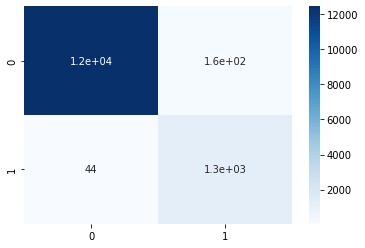

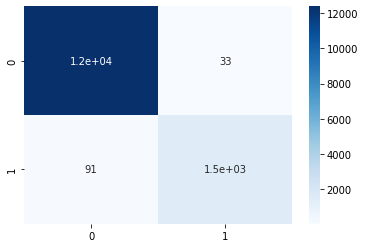

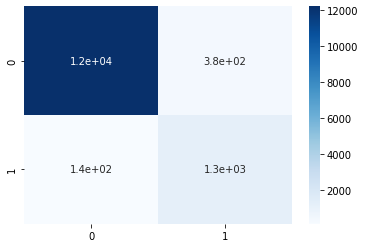

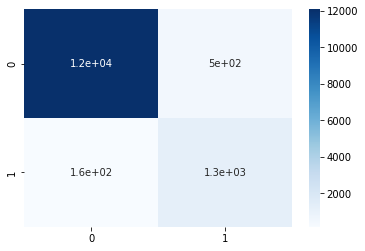

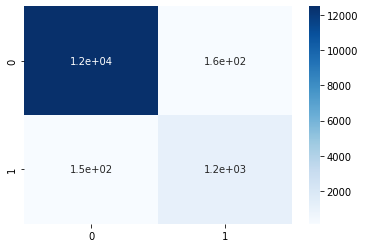

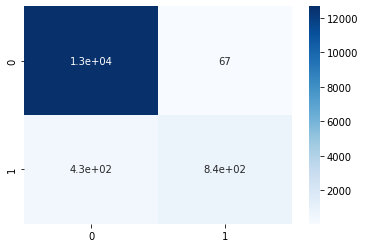

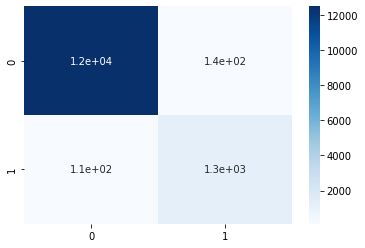

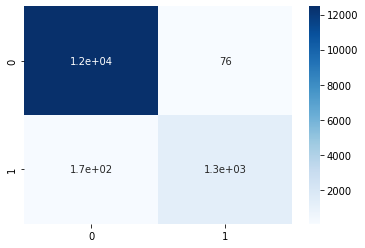

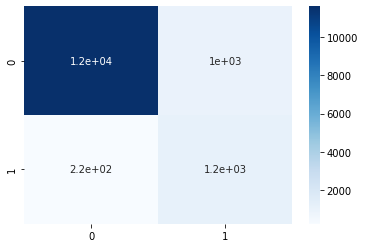

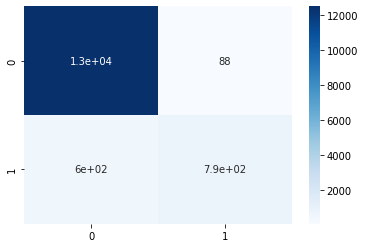

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

for label in range(10):
  model = models[label]
  y_pred = model.predict(x_test)
  cm = confusion_matrix(y_test == label ,y_pred)
  sns.heatmap(cm,cmap="Blues", annot=True)
  plt.show()